# Predictive Analytics For Patient Discharge Using Electronic Health Records

Name: Shrey Sanjay Kekade

Student ID: x23194316@student.ncirl.ie

Notebook Execution Time: 25 minutes and 27 seconds

# Import Libraries

In [1]:
# Essential libraries for data manipulation and visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import numpy as np

# Scikit-learn: Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer

from sklearn.feature_selection import RFE
#from sklearn.decomposition import PCA

# Scikit-learn: modeling
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Scikit-learn: evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, roc_curve,
    precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
)

# To save the model
import joblib

# Increase font size globally
rcParams.update({'font.size': 12})

# Suppress warnings for cleaner outputs
import warnings
warnings.filterwarnings("ignore")

# Import Cleaned Data

In [2]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,LEUCOCYTE,THROMBOCYTE,MCHC,AGE,SEX,SOURCE,group1_PCA,group2_PCA
0,-0.381878,0.510502,0.209160,-2.09982,0,1,0.493173,1.689631
1,1.002425,0.704997,0.534754,-2.09982,0,1,-1.705008,0.597836
2,1.078084,0.469435,0.290558,-2.09982,0,1,0.727647,2.607885
3,0.628148,0.958077,1.348738,-2.09982,0,1,-0.669649,0.824660
4,2.072920,0.696977,-1.093215,-2.09982,1,1,1.739804,2.476591


# Spliting the Data for Modelling

In [4]:
# Splitting the dataset into features and target variable
print("\nPreparing data for training and testing...")
X = df.drop('SOURCE', axis=1)
y = df['SOURCE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Data successfully split into training and testing sets.")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Preparing data for training and testing...
Data successfully split into training and testing sets.
Training features shape: (3529, 7)
Testing features shape: (883, 7)
Training labels shape: (3529,)
Testing labels shape: (883,)


# Define Models and Hyperparameters

In [5]:
# Define the models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'Neural Network': MLPClassifier(random_state=42, max_iter=2000)
}

# Define the parameter grids for GridSearchCV
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],  # Expanded range for regularization strength
        'solver': ['lbfgs', 'liblinear']  # Common solvers for small and large datasets
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],  # Test splitting criteria
        'max_depth': [5, 10, 15, 20],  # Increased granularity for depth
        'min_samples_split': [2, 5, 10, 20],  # Minimum samples to split
        'min_samples_leaf': [1, 2, 5, 10]  # Test leaf node size
    },
    'Random Forest': {
        'n_estimators': [100, 200, 500],  # Increased number of trees for better performance
        'max_depth': [10, 20, 30, None],  # Allow deeper trees for complex data
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
        'bootstrap': [True, False]  # Test with and without replacement
    },
    'Support Vector Machine': {
        'C': [0.01, 0.1, 1, 10],  # Finer control over regularization strength
        'kernel': ['linear', 'rbf', 'poly'],  # Test additional kernel types
        'gamma': ['scale', 'auto'],  # Kernel coefficient for non-linear models
        'degree': [2, 3, 4]  # Polynomial kernel degree
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 50)],  # Varying network size
        'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
        'learning_rate': ['constant', 'adaptive'],  # Explore adaptive learning rates
        'activation': ['relu', 'tanh']  # Test different activation functions
    }
}

# Train and Evaluate Models


Training and tuning Logistic Regression:

Evaluation Metrics for Logistic Regression:
  Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
  Accuracy: 0.7135
  Precision: 0.7098
  Recall: 0.8507
  F1 Score: 0.7739
  AUC-ROC: 0.7674


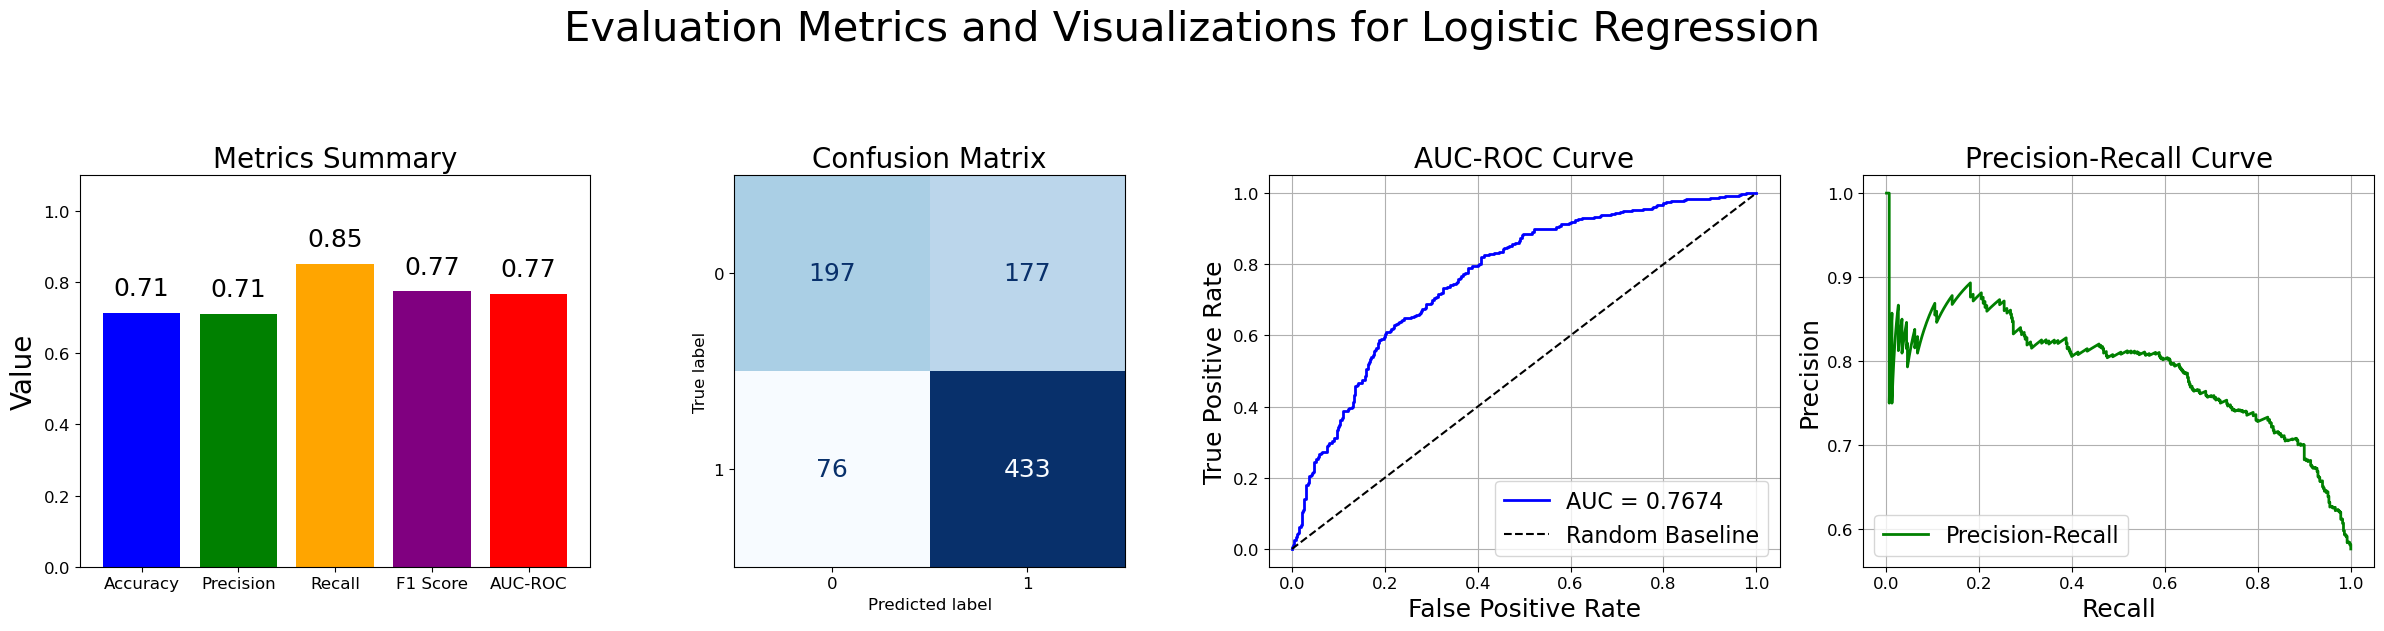


Training and tuning Decision Tree:

Evaluation Metrics for Decision Tree:
  Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
  Accuracy: 0.7350
  Precision: 0.7295
  Recall: 0.8585
  F1 Score: 0.7888
  AUC-ROC: 0.7668


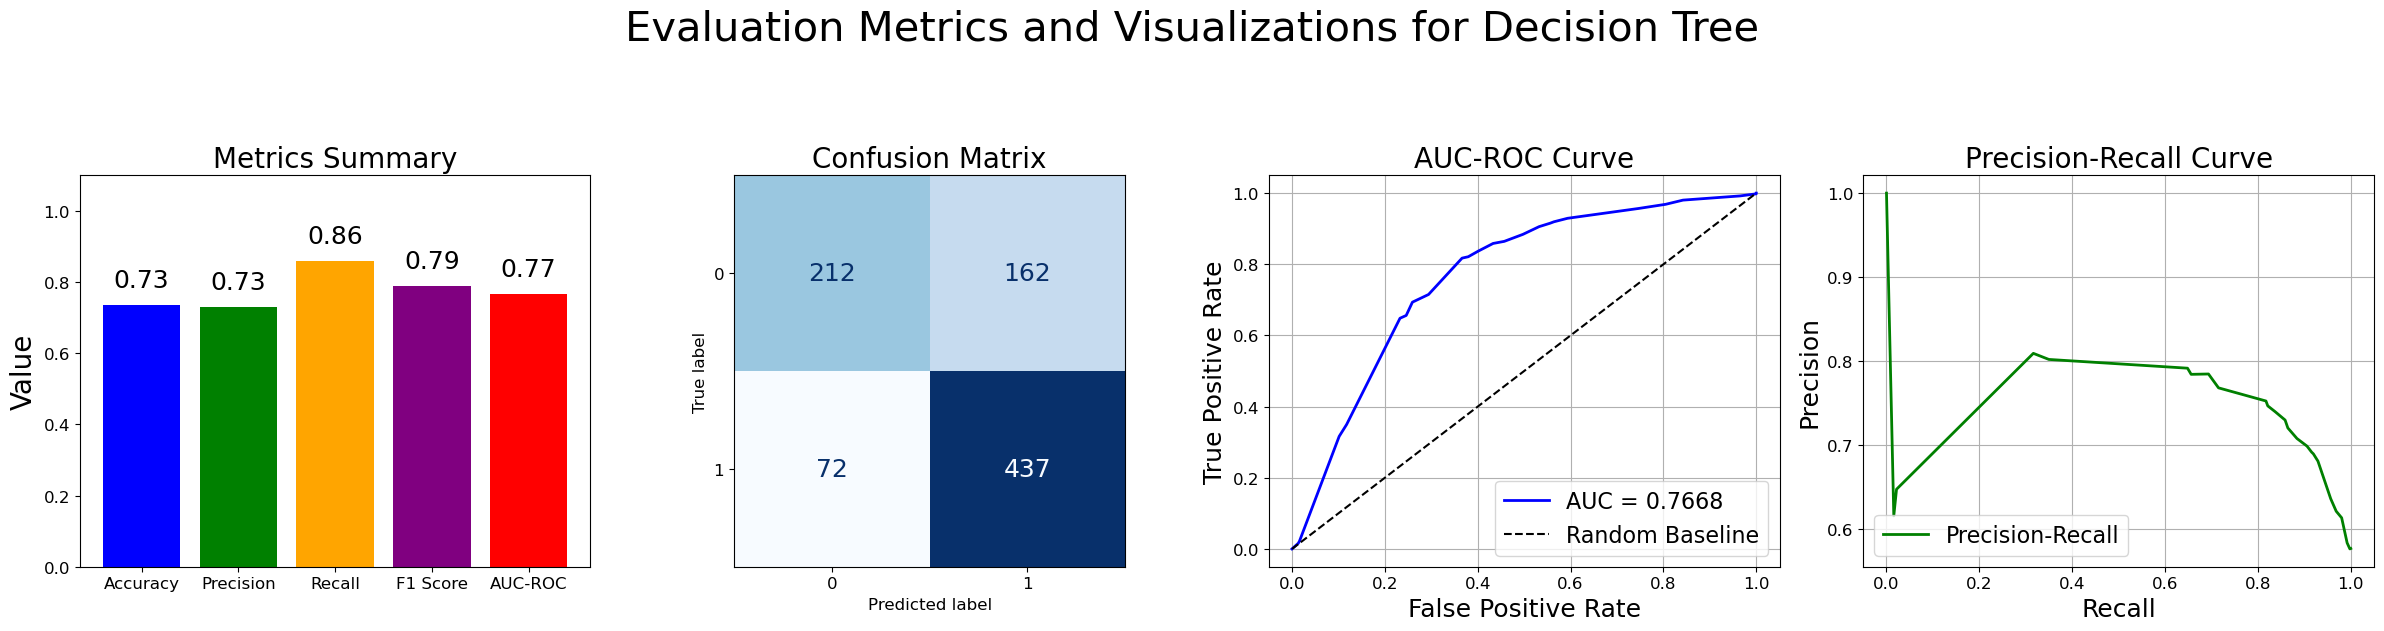


Training and tuning Random Forest:

Evaluation Metrics for Random Forest:
  Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
  Accuracy: 0.7576
  Precision: 0.7513
  Recall: 0.8664
  F1 Score: 0.8047
  AUC-ROC: 0.8131


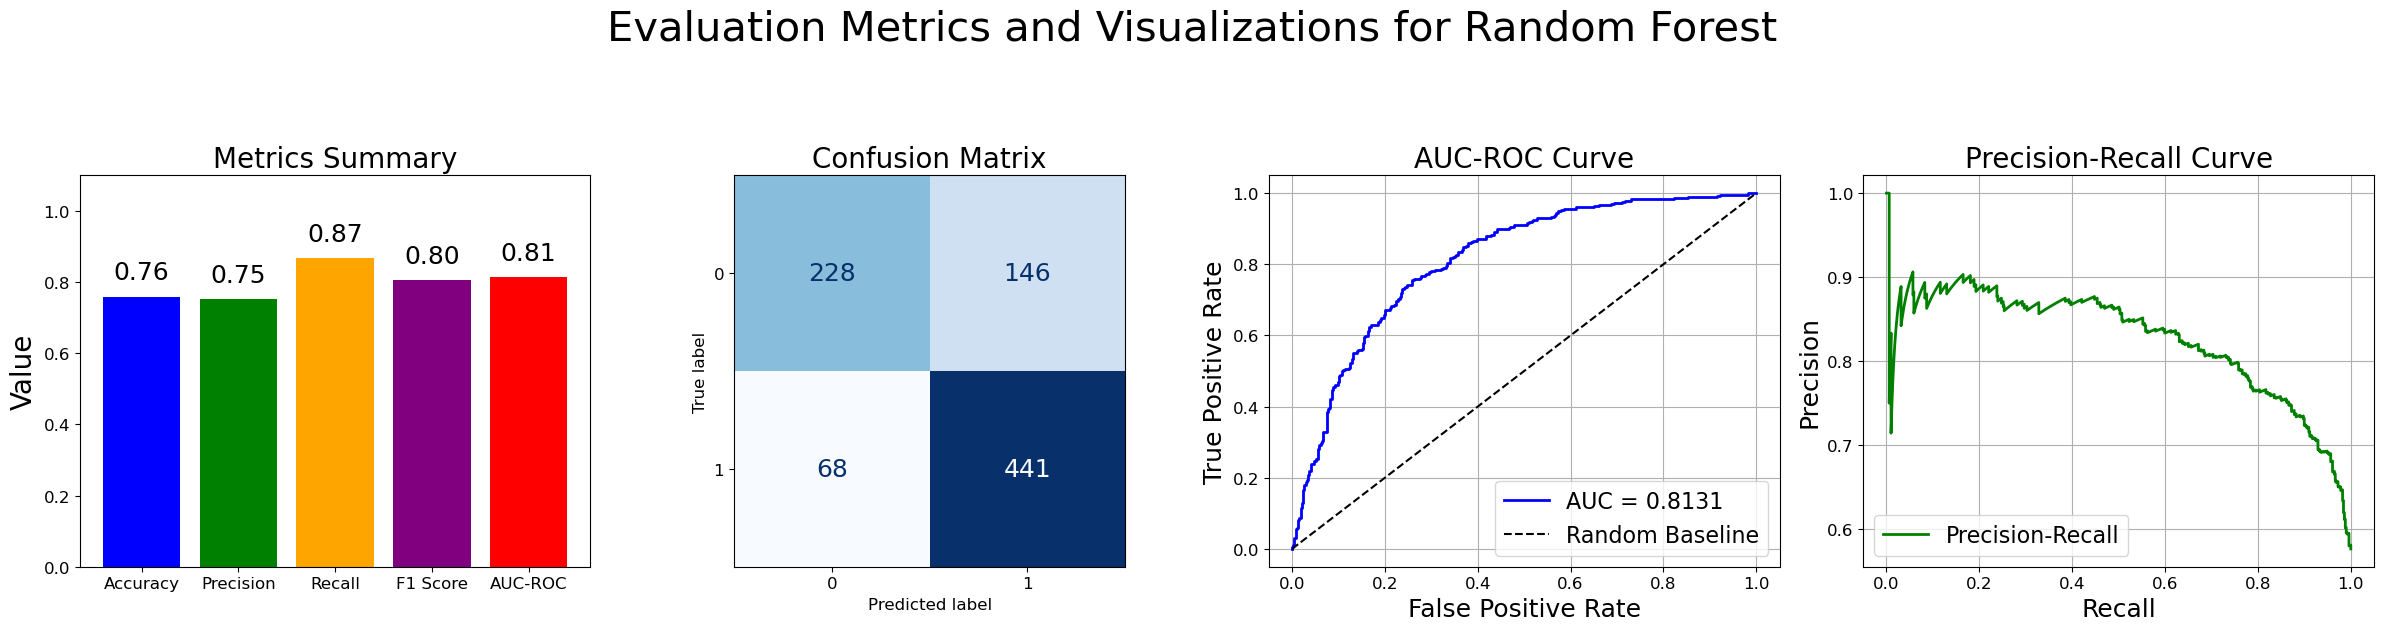


Training and tuning Support Vector Machine:

Evaluation Metrics for Support Vector Machine:
  Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
  Accuracy: 0.7418
  Precision: 0.7346
  Recall: 0.8644
  F1 Score: 0.7942
  AUC-ROC: 0.8062


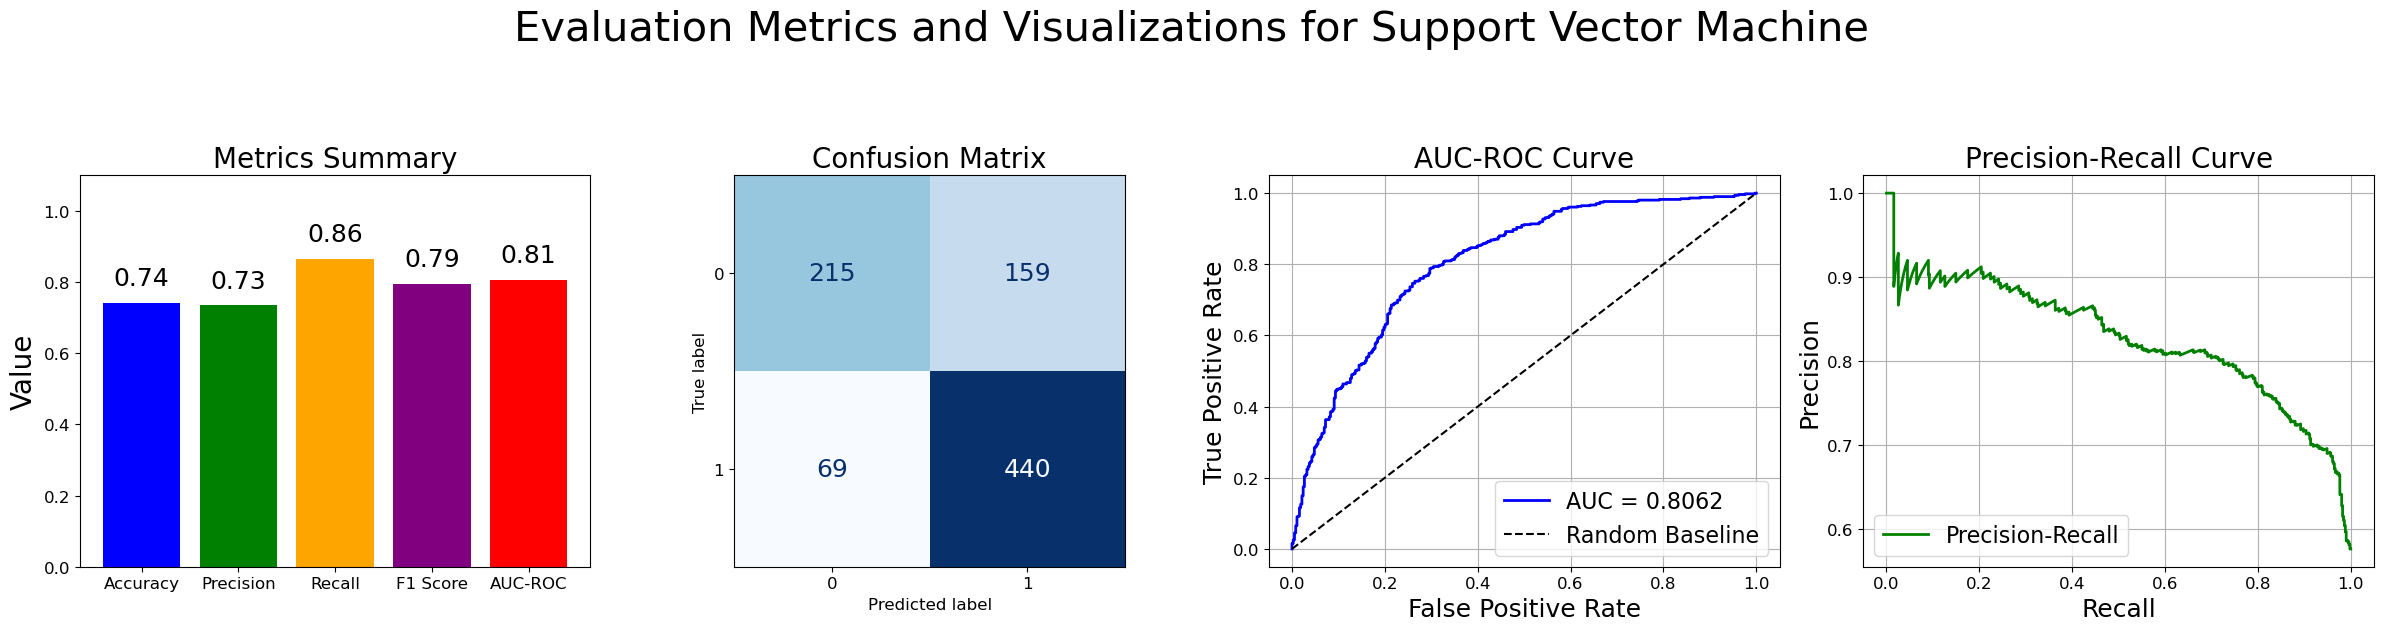


Training and tuning Neural Network:

Evaluation Metrics for Neural Network:
  Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant'}
  Accuracy: 0.7565
  Precision: 0.7673
  Recall: 0.8291
  F1 Score: 0.7970
  AUC-ROC: 0.8046


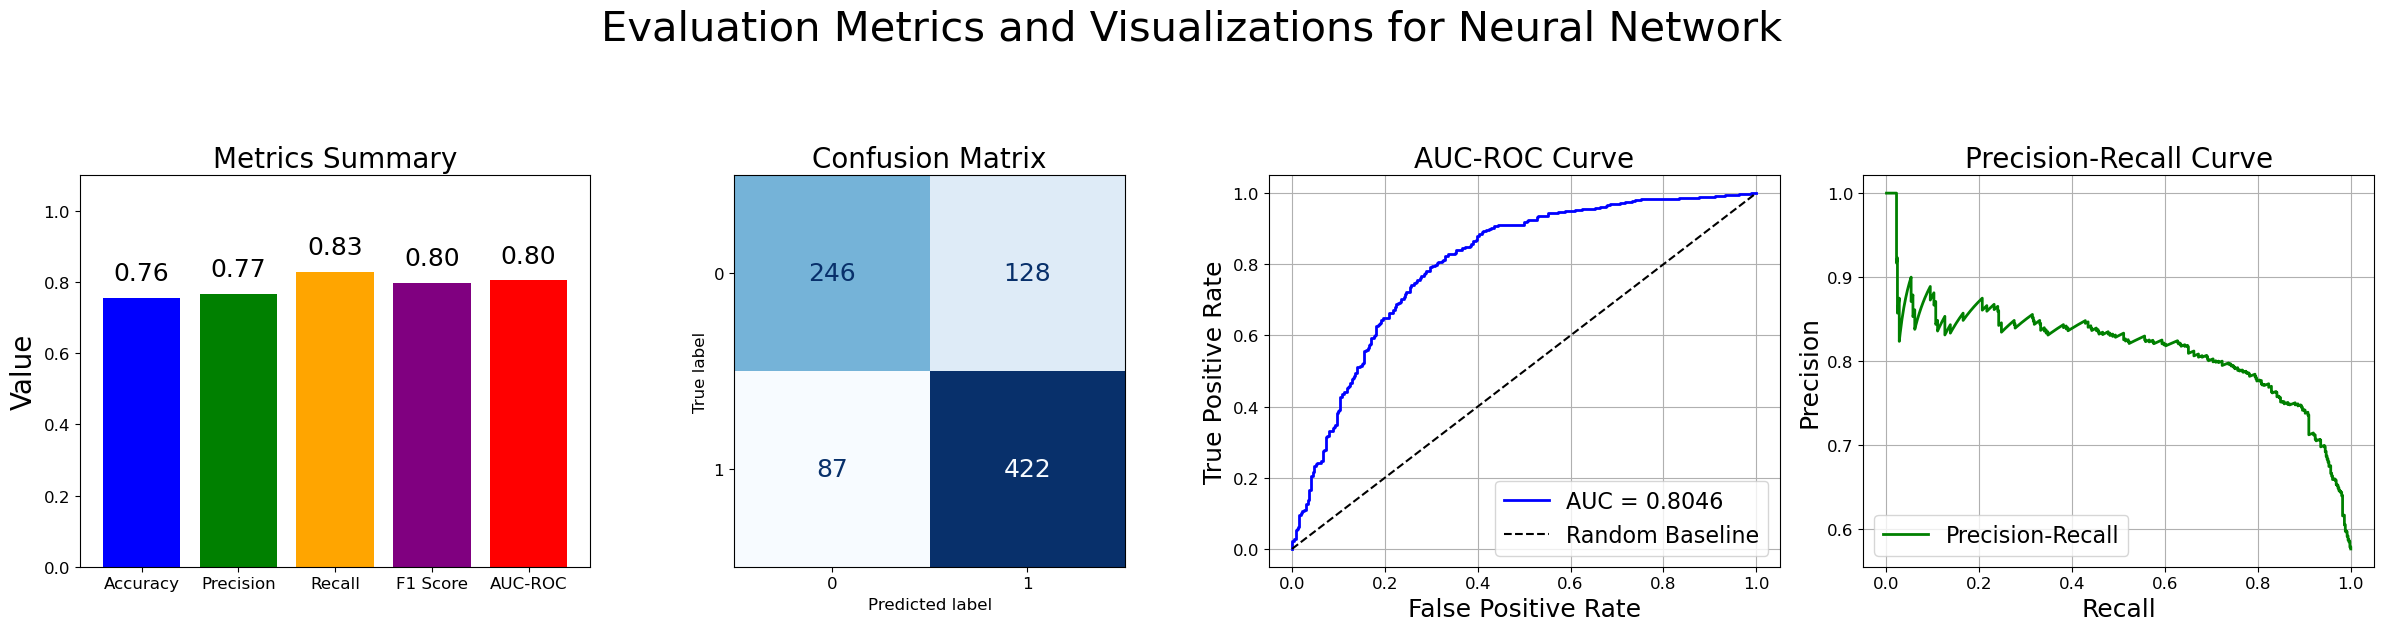

In [6]:
best_models = {}
# Dictionary to store evaluation metrics and best parameters for all models
evaluation_results = {}

# Train and evaluate each model with enhanced visualizations
for model_name, model in models.items():
    print(f"\nTraining and tuning {model_name}:")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, 'predict_proba') else None

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Save the results
    evaluation_results[model_name] = {
        "best_params": grid_search.best_params_,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "auc_roc": auc_roc,
    }

    # Print evaluation metrics
    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"  Best Parameters: {grid_search.best_params_}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    if auc_roc is not None:
        print(f"  AUC-ROC: {auc_roc:.4f}")

    # Create a horizontal subplot for enhanced visualizations
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    fig.suptitle(f"Evaluation Metrics and Visualizations for {model_name}", fontsize=30, y=1.05)

    # Plot summary metrics as a bar chart
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
    values = [accuracy, precision, recall, f1, auc_roc if auc_roc is not None else 0]
    axes[0].bar(metrics, values, color=['blue', 'green', 'orange', 'purple', 'red'])
    axes[0].set_ylim(0, 1.1)  # Set limit to 1.1 to ensure space above bars
    axes[0].set_title("Metrics Summary", fontsize=20)
    for i, v in enumerate(values):
        axes[0].text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=18)
    axes[0].set_ylabel('Value', fontsize=20)
    axes[0].tick_params(axis='both', labelsize=12)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    disp.plot(cmap='Blues', ax=axes[1], colorbar=False)
    
    # Increase the font size of the numbers inside the confusion matrix
    for text in disp.text_.ravel():  # Access each text element
        text.set_fontsize(18)  
        
    axes[1].set_title("Confusion Matrix", fontsize=20)
    axes[1].tick_params(axis='both', labelsize=12)
    axes[1].grid(False)

    # Plot AUC-ROC curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        axes[2].plot(fpr, tpr, label=f'AUC = {auc_roc:.4f}', color='blue', linewidth=2)
        axes[2].plot([0, 1], [0, 1], 'k--', label='Random Baseline')
        axes[2].set_title("AUC-ROC Curve", fontsize=20)
        axes[2].set_xlabel('False Positive Rate', fontsize=18)
        axes[2].set_ylabel('True Positive Rate', fontsize=18)
        axes[2].legend(loc="lower right", fontsize=16)
        axes[2].tick_params(axis='both', labelsize=12)
        axes[2].grid(True)

    # Plot precision-recall curve
    if y_proba is not None:
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
        axes[3].plot(recall_vals, precision_vals, label='Precision-Recall', color='green', linewidth=2)
        axes[3].set_title("Precision-Recall Curve", fontsize=20)
        axes[3].set_xlabel('Recall', fontsize=18)
        axes[3].set_ylabel('Precision', fontsize=18)
        axes[3].legend(loc="lower left", fontsize=16)
        axes[3].tick_params(axis='both', labelsize=12)
        axes[3].grid(True)

    # Adjust layout and show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Compare the Models 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the evaluation_results dictionary into a DataFrame
evaluation_df = pd.DataFrame(evaluation_results).T  # Transpose to make models as rows
evaluation_df.reset_index(inplace=True)
evaluation_df.rename(columns={'index': 'Model'}, inplace=True)

# Display the table
print("Evaluation Results Table:")
evaluation_df

Evaluation Results Table:


,Model,best_params,accuracy,precision,recall,f1_score,auc_roc
0,Logistic Regression,"{'C': 0.1, 'solver': 'lbfgs'}",0.713477,0.709836,0.850688,0.773905,0.767448
1,Decision Tree,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.734994,0.729549,0.858546,0.788809,0.766833
2,Random Forest,"{'bootstrap': False, 'max_depth': 10, 'min_sam...",0.757644,0.751278,0.866405,0.804745,0.813081
3,Support Vector Machine,"{'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel...",0.741789,0.734558,0.86444,0.794224,0.806176
4,Neural Network,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.756512,0.767273,0.829077,0.796978,0.804639


In [8]:
# Save the evaluation DataFrame as a CSV file
evaluation_df.to_csv('EHR_model_evaluation_results.csv', index=False)

print("Evaluation results saved as 'EHR_evaluation_results.csv'.")

Evaluation results saved as 'EHR_evaluation_results.csv'.


# Comparative Metrics Plot Across Models

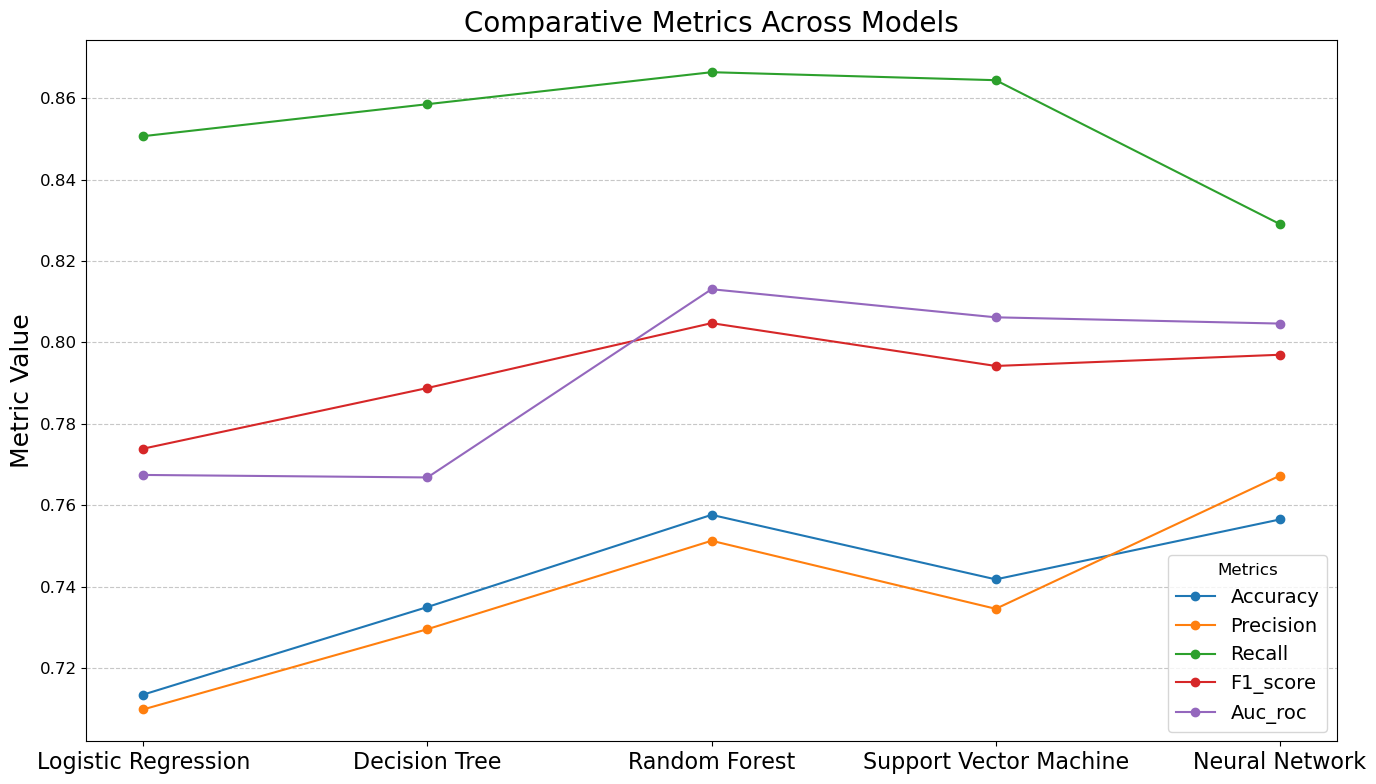

In [9]:
# Plot metrics for models
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']

# Plotting bar charts for metrics
plt.figure(figsize=(14, 8))
for metric in metrics_to_plot:
    plt.plot(evaluation_df['Model'], evaluation_df[metric], marker='o', label=metric.capitalize())

# Customize the plot
plt.title('Comparative Metrics Across Models', fontsize=20)
plt.ylabel('Metric Value', fontsize=18)
plt.xticks( fontsize=16)
plt.legend(title='Metrics', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Visualizations for the Best Model - Random Forest

## Feature Importance

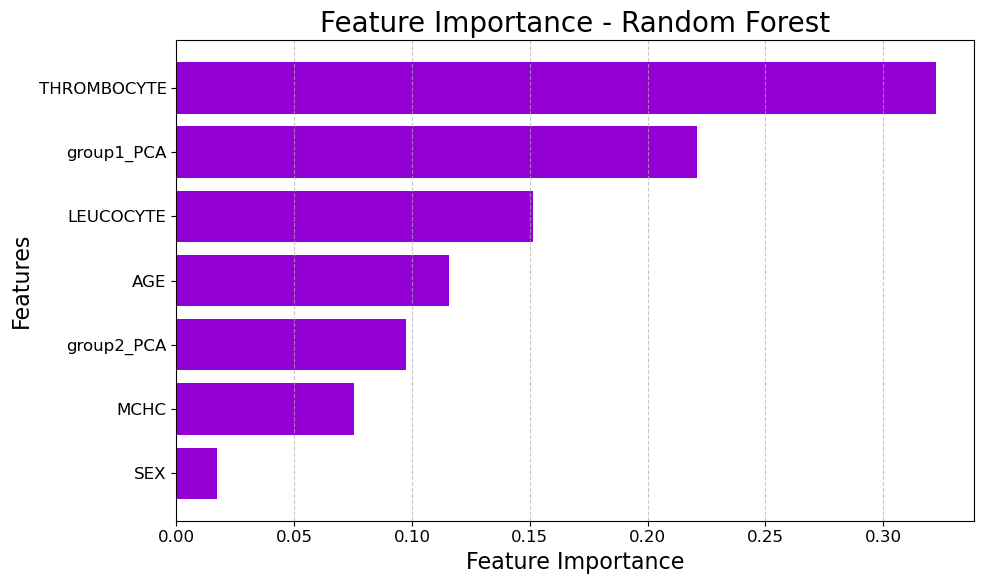

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importance from the best Random Forest model
random_forest_model = best_models['Random Forest']
feature_importances = random_forest_model.feature_importances_

# Match features with their importance
features = X.columns  # Replace with the original feature names
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='darkviolet')
plt.xlabel('Feature Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Feature Importance - Random Forest', fontsize=20)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## A Decision Tree from Random Forest

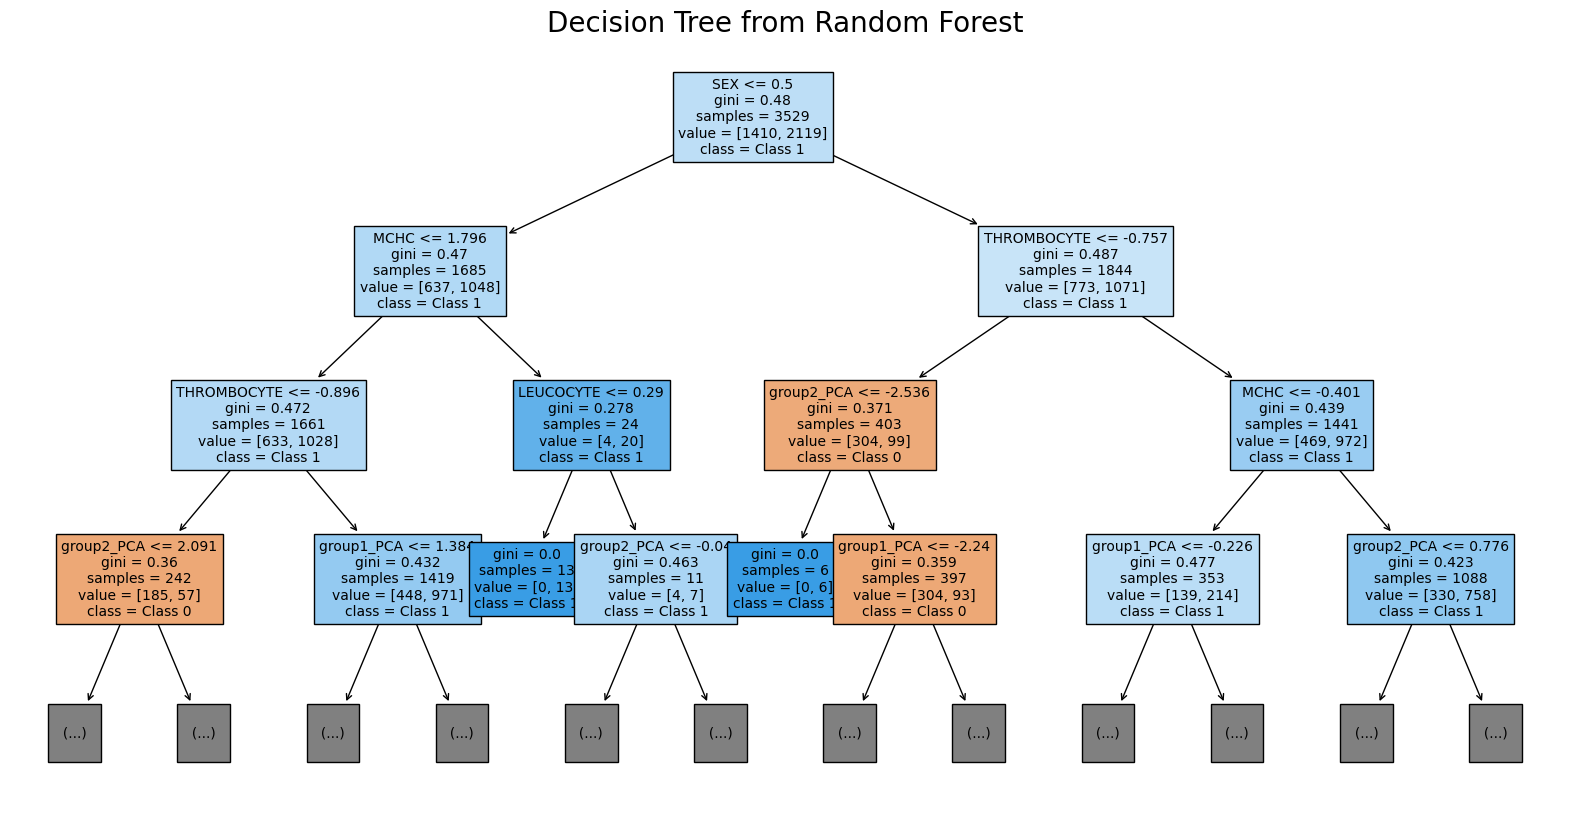

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Access the Random Forest model
random_forest_model = best_models['Random Forest']

# Select a single tree from the Random Forest
single_tree = random_forest_model.estimators_[0]  # Get the first tree

# Convert feature names to a list
feature_names = list(X_train.columns)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=feature_names, class_names=['Class 0', 'Class 1'], filled=True, fontsize=10, max_depth = 3)
plt.title("Decision Tree from Random Forest", fontsize=20)
plt.show()



# Save the Random Forest Model

In [12]:
# Save the Random Forest model
joblib.dump(random_forest_model, 'random_forest_model.pkl')

print("Random Forest model saved as 'random_forest_model.pkl'.")

Random Forest model saved as 'random_forest_model.pkl'.
